In [2]:
import tweepy 
import pandas as pd
import os
import nltk
import re
import csv
import matplotlib.pyplot as plt
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import itertools

In [3]:
    #giving the keys for the twitter
access_token = "1263110779458420740-Ah9wqjpKGhwKpEp3xLQd4aSbXxJT3o"
access_token_secret = "9H8AVlNYJCixKE5wXPYllZ0vzBw7xihYqFCh3NuoOFoRl"
consumer_key = "KEmBKiAHY4VSi8y7WUEAgYx0G"
consumer_secret = "9CYCUAfTfOjWPOSiNfLHPC8dilH8Sno9UyoM4mWorRrZpC5Zio"

In [4]:
authentication = tweepy.OAuthHandler(consumer_key, consumer_secret)
authentication.set_access_token(access_token, access_token_secret)
api = tweepy.API(authentication,wait_on_rate_limit=True)

In [9]:
#Data Cleaning Function for Twitter Tweets
def text_cleaning_function(tweet_text):
    cleaned_tweet_text = re.sub(r"http\S+", "", tweet_text)
    cleaned_tweet_text = re.sub('@[^\s]+',"", cleaned_tweet_text)
    cleaned_tweet_text = re.sub(r"[^a-zA-Z0-9]+", ' ', cleaned_tweet_text)
    return cleaned_tweet_text

In [10]:
#Setting the keywords in an arry
keywords=["Altcoin","Coindesk","Cryptocurrency","Gold","APPL","GOOG","Bitcoin","YHOO"]

date1 = "2020-06-24"
date2 = "2020-06-25"
date3 = "2020-06-26"
date4 = "2020-06-27"
date5 = "2020-06-28"
date6 = "2020-06-30"
date7 = "2020-07-01"
date8 = "2020-07-02"

#getting tweets according to date and storing them in csv

for keyword in keywords:
    #print (keyword)
    tweets1 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date1,until=date2,tweet_mode='extended').items(2)
    tweets2 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date2,until=date3,tweet_mode='extended').items(2)
    tweets3 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date3,until=date4,tweet_mode='extended').items(2)
    tweets4 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date4,until=date5,tweet_mode='extended').items(2)
    tweets5 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date5,until=date6,tweet_mode='extended').items(2)
    tweets6 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date6,until=date7,tweet_mode='extended').items(2)
    tweets7 = tweepy.Cursor(api.search, q="#"+keyword+" -filter:retweets",result_type="mixed", lang="en", since=date7,until=date8,tweet_mode='extended').items(2)
    
    tweets = itertools.chain(tweets1, tweets2, tweets3, tweets4, tweets5, tweets6, tweets7)
    #Data storing 
    open_csv_file = open(keyword+'.csv', 'a')
    #Use csv Writer
    with open(keyword+'.csv', 'w') as output_csv:
        writer = csv.DictWriter(output_csv, fieldnames = ["tweet_id", "Posted time", "User ID", "Tweet text"])
        writer.writeheader()
        csv_writer = csv.writer(open_csv_file)
        
    for single_tweet in tweets:
        #print (single_tweet.full_text)
        cleaned_tweet_text = text_cleaning_function(single_tweet.full_text)
        print ("*" + cleaned_tweet_text)
        csv_writer.writerow([single_tweet.id,single_tweet.created_at,single_tweet.user.id, cleaned_tweet_text])
    output_csv.close()
    print (type(tweets))
    

*This ones for mineon wearenotretail BTC bitcoin altcoin asics
* Ripple launches PayID invoices and subscriptions demo page blockchain altcoin cryptonews
*Wear a mask or don t Just say out my bubble my pod and face my poly shield please mineon wearenotretail BTC bitcoin altcoin asics
*1 Bitcoin BTC Dollar 9159 32 1 Bitcoin Cash BCH Dollar 2 30 18 1 Ethereum ETH Dollar 229 68 1 Ripple XRP Dollar 0 18280 Date 26 Jun 2020 23 46 Bitcoin Ethereum cryptocurrency crypto altcoin Blockchain Ripple
* Bitcoin Bull Run Was Here But White Swan Pandemic Put It On Lockdown cryptotrading altcoin bitcoinprice 
*1 Bitcoin BTC Dollar 9011 52 1 Bitcoin Cash BCH Dollar 2 17 20 1 Ethereum ETH Dollar 221 08 1 Ripple XRP Dollar 0 17548 Date 27 Jun 2020 23 46 Bitcoin Ethereum cryptocurrency crypto altcoin Blockchain Ripple
*Why Top Traders Expect Bitcoin to Hit 13 000 Despite Short Term Weakness BTC altcoin trading bitcoin
*Order your secure and smart BTC ETH Altcoin hardware wallet Only 94 80 EUR bitcoin btc 

*Major AR AugmentedReality news from Google GOOG today as descendant of Tango emerges ARCore DepthAPI can build motion based spacial 3D depth map from a standard RGB camera ToF depth sensor not required but can be used to improve depth map 
* GOOG breaks back above 20 day moving average Sentiment Neutral GOOG Google
*Check out my latest article Microsoft Makes Bold Move in Deploying Rebuilt Edge Web Browser to Windows Users Using Google s Technologies to Reclaim Market Share from Google via Advertising Search SEO GOOG MSFT AAPL
* GOOG plummets losing 81 43 5 65 within a single day on high volume Sentiment Very bearish GOOG Google
*Oh the dance on up then down then sideways and repeat Your money is dead I say in this Titanic vessel I would move it to payc goog etc but not clr Slow death as prices haven t recovered and debt looming in the horizon 
* You do realize that GOOG was seeded with taxpayer dollars right 
* GOOG closes within prior day s range Sentiment Bullish GOOG Google
* GOOG

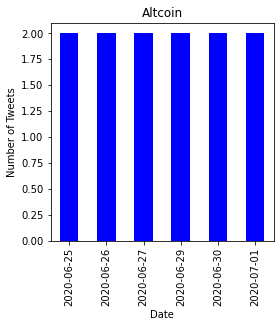

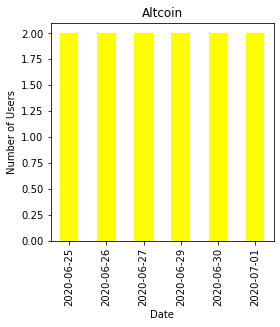

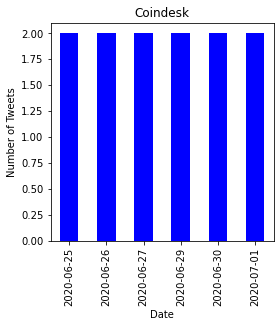

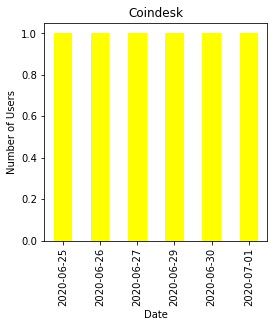

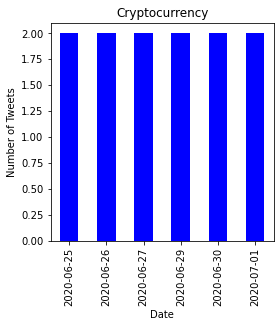

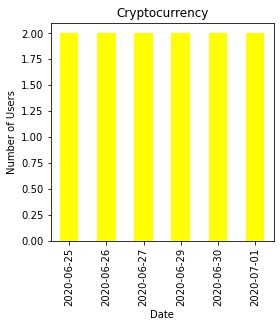

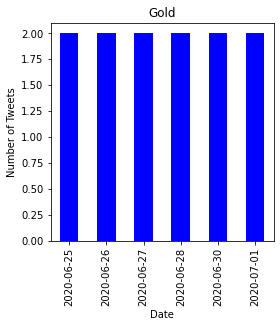

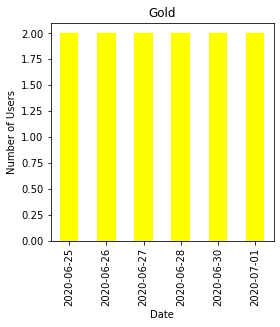

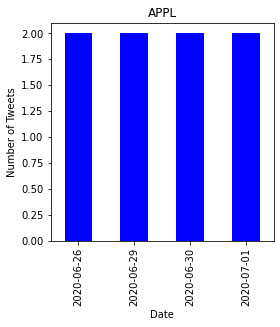

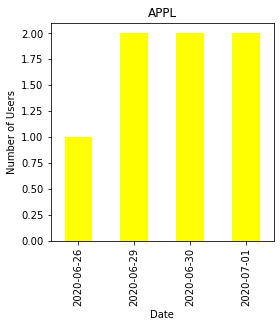

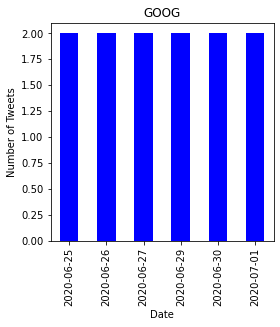

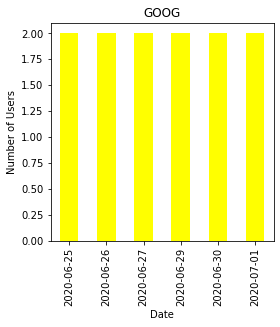

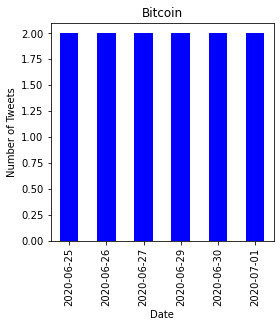

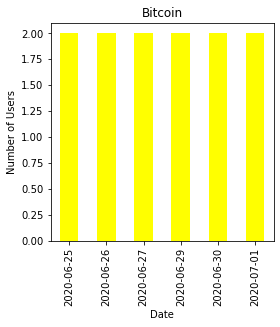

Tweets not available for #YHOO on applied dates.


In [19]:
#fetching data from csv and visualize it on bar graph using plt from matplotlib
for keyword in keywords:
        data_frame = pd.read_csv(keyword+'.csv')
        data_frame.tail()
        if data_frame.empty:
            print("Tweets not available for #"+keyword+ " on applied dates.")  
        else:
            data_frame['year'] = pd.DatetimeIndex(data_frame['Posted time']).year
            
            data_frame['date'] = pd.DatetimeIndex(data_frame['Posted time']).date
            data_frame['month'] = pd.DatetimeIndex(data_frame['Posted time']).month
            data_frame.tail()
            tweet_count = data_frame.groupby('date')['tweet_id'].count()
            #print(tweet_count)
            user_count = data_frame.groupby('date')['User ID'].nunique()
            #print(user_count)
            #plotting graph
            
            tweet_count.plot(kind='bar',color='blue',figsize=(4,4))
            plt.title(keyword)
            plt.xlabel('Date')
            plt.ylabel('Number of Tweets')
             plt.show()
            
            user_count.plot(kind='bar',color='yellow',figsize=(4,4))
            plt.title(keyword)
            plt.xlabel('Date')
            plt.ylabel('Number of Users')
            
            plt.show()